# Importando Pacotes

In [ ]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


from sklearn.metrics import mean_squared_error,classification_report, plot_confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV, validation_curve, learning_curve, train_test_split, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.ensemble import IsolationForest
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.metrics import multilabel_confusion_matrix

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

In [ ]:
def confusion_matrix(model,X,y):
  matrix = plot_confusion_matrix(model,X,y,normalize='true',cmap=plt.cm.Reds)
  matrix.ax_.set_title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.gcf().set_size_inches(15,8)
  plt.show()

In [ ]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 20,
    'figure.figsize': (24,15)
})

In [ ]:
pd.set_option('display.max_rows', 100)

# Importando os dados

In [ ]:
!unzip '/content/UCI HAR Dataset.zip'

Archive:  /content/UCI HAR Dataset.zip
  inflating: X_test.txt              
  inflating: X_train.txt             
  inflating: y_test.txt              
  inflating: y_train.txt             


In [ ]:
files = ['X_train.txt','X_test.txt','y_train.txt','y_test.txt']
X_train,X_test,y_train,y_test = tuple([pd.read_csv(f,delim_whitespace=True,header=None) for f in files])

In [ ]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [ ]:
label_quality = LabelEncoder()
y_train = label_quality.fit_transform(y_train)
y_test = label_quality.fit_transform(y_test)

In [ ]:
#y_train = y_train.astype('category')
#y_test = y_test.astype('category')

In [ ]:
#y_test.info()

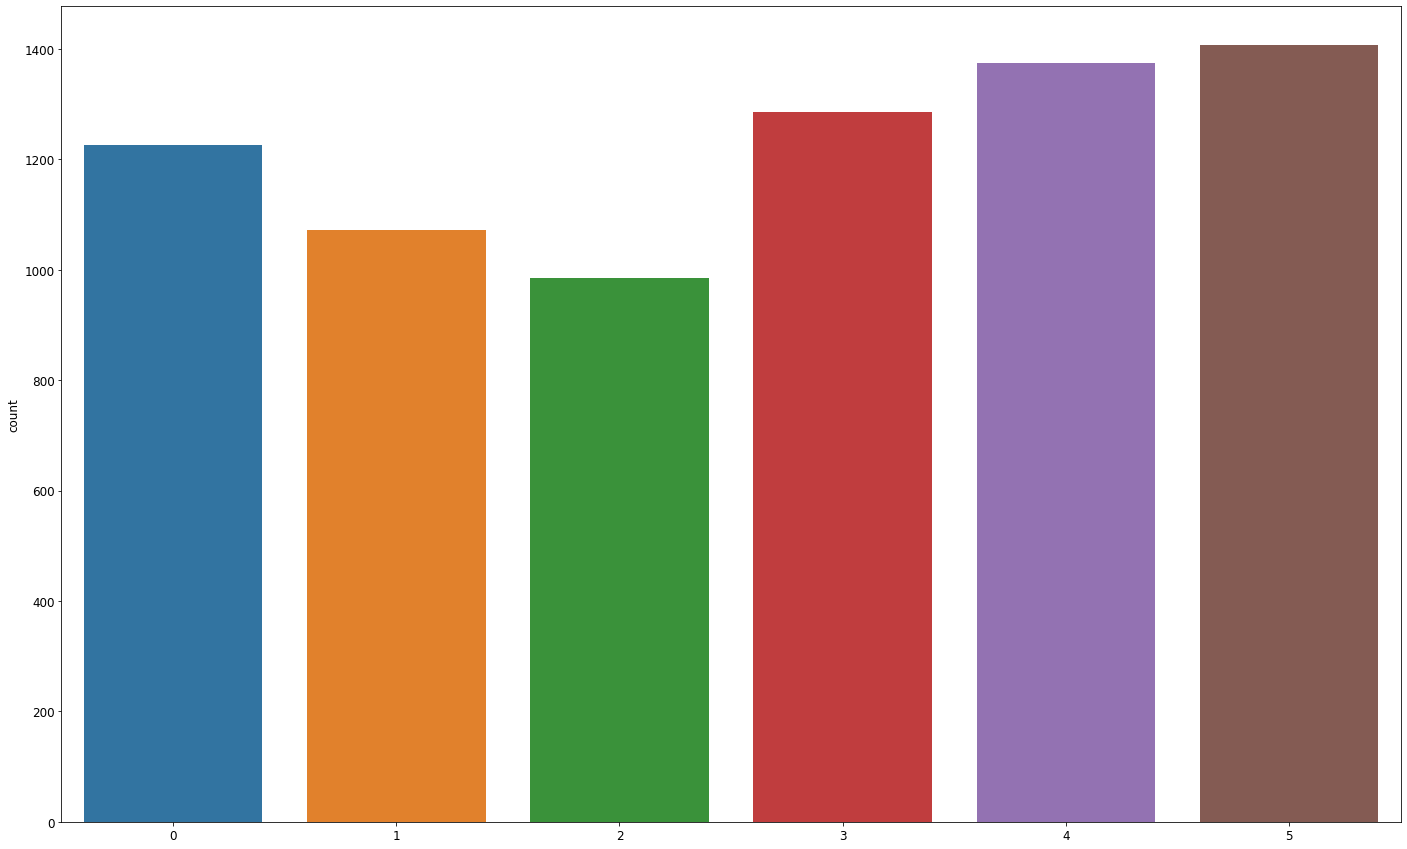

In [ ]:
sns.countplot(y_train)

# Regressão logística

In [ ]:
X_train_scaled = X_train
X_test_scaled = X_test

In [ ]:
#For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used
# to find the predicted probability of each class. Else use a one-vs-rest approach,
# i.e calculate the probability of each class assuming it to be positive using the logistic function. 
#and normalize these values across all the classes.
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
folds = StratifiedShuffleSplit(n_splits=5, random_state=1) # antes era 5 

In [ ]:
models = []
models.append(('softmax',LogisticRegression(multi_class='multinomial',random_state=1,max_iter=4000))) # Softmax
models.append(('1 x all',LogisticRegression(multi_class='ovr',random_state=1, max_iter = 4000)))  # one vs rest     
models.append(('1 x 1',OneVsOneClassifier(LogisticRegression(random_state=1, max_iter = 4000))))  # one vs one  

In [ ]:
results = []
names = []

for name, model in models:
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=folds,scoring='f1_macro')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


  print(msg)

softmax: 0.988003 (0.006087)
1 x all: 0.988214 (0.005557)
1 x 1: 0.987250 (0.006091)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


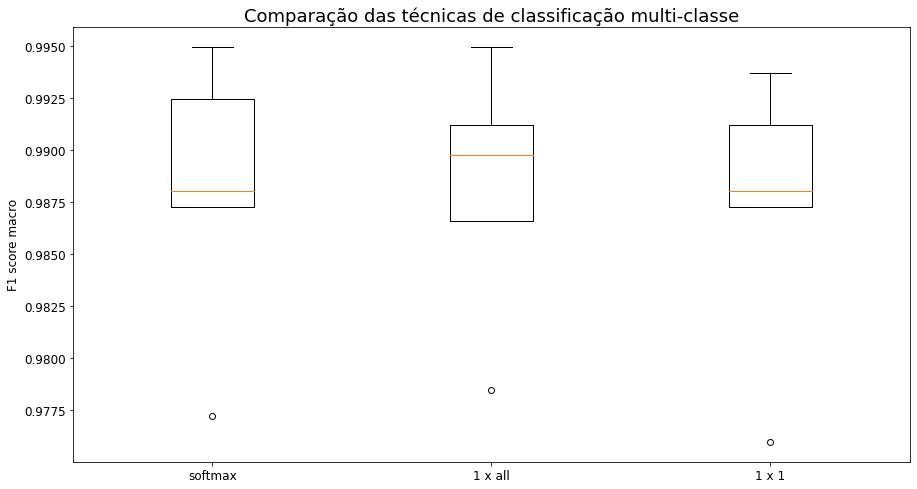

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.title('Comparação das técnicas de classificação multi-classe', fontsize=18)
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('F1 score macro')
ax.set_xticklabels(names)
plt.show()


https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/ 


In [ ]:
log_regression_base = LogisticRegression(multi_class='ovr',random_state=1, max_iter = 4000)

cv_results = cross_val_score(log_regression_base, X_train_scaled, y_train, cv=folds,scoring='f1_macro')

log_fitado = log_regression_base.fit(X_train_scaled,y_train)
y_predito_base = log_fitado.predict(X_test_scaled)

score_base = cv_results.mean()
print("Score da validação cruzada do modelo base: ", score_base)

Score da validação cruzada do modelo base:  0.988213903804722


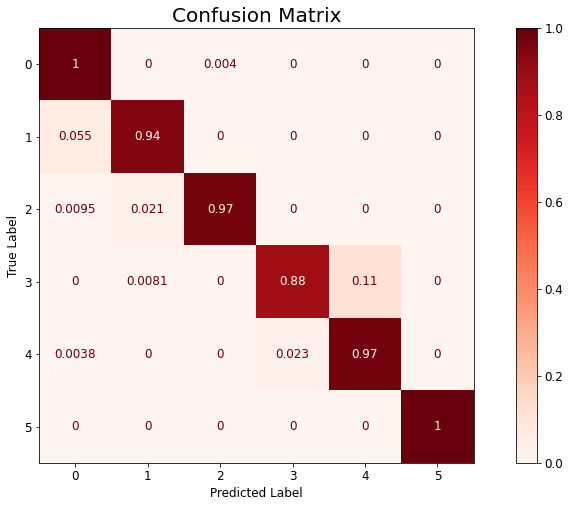

In [ ]:
confusion_matrix(log_regression_base,X_test_scaled,y_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [ ]:
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)

In [ ]:
result_k = []
name_k = []

result_test = []

#num = [1,3,5,7,9,11,13,15,17,19,21,23,25]

num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

for k in num:
  neigh = KNeighborsClassifier(n_neighbors=k)
  
  #cv_results = cross_val_score(neigh, X_train_scaled, y_train, cv=folds, scoring='f1_micro')

  neigh_fitado = neigh.fit(X_train_scaled,y_train)
  neigh_predito = neigh_fitado.predict(X_test_scaled)

  #result_k.append(cv_results)
  name_k.append(k)
  #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


  #print(f1_score(neigh_predito,y_test,average='macro'))
  result_test.append( f1_score(neigh_predito,y_test,average='macro')   )

  #score_base = cv_results.mean()
  #print("modelo kNN: %f - score: %f" % (k,score_base))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


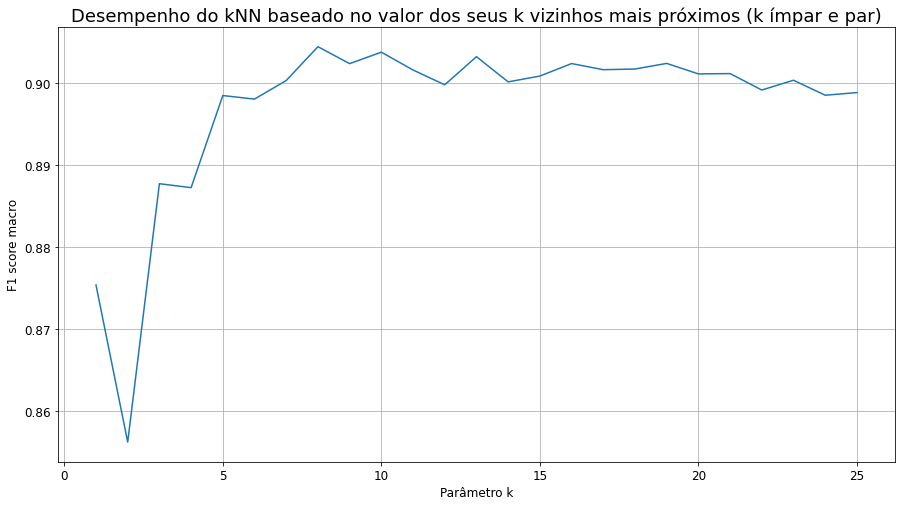

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.title('Desempenho do kNN baseado no valor dos seus k vizinhos mais próximos (k ímpar e par)', fontsize=18)
ax = fig.add_subplot(111)
plt.plot(name_k,result_test)
plt.ylabel('F1 score macro')
plt.xlabel('Parâmetro k')
plt.grid()
plt.show()

In [ ]:
name_k

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [ ]:
result_test

[0.8754095346937208,
 0.8562633495030388,
 0.8877674593824842,
 0.8872860298074353,
 0.8985210973000696,
 0.89808841076941,
 0.9003526839358861,
 0.9044789027262965,
 0.9024124975378373,
 0.9038079349608216,
 0.9016362924804975,
 0.8998321077688379,
 0.9032598392840043,
 0.900185736872923,
 0.9008973409064632,
 0.9024202035665766,
 0.9016723419388274,
 0.9017539606107201,
 0.9024410489412377,
 0.9011615235470624,
 0.9011969921146111,
 0.8991946706528543,
 0.9003871391323205,
 0.8985598912282899,
 0.8988798072357769]

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=13)
  
neigh_fitado = neigh.fit(X_train_scaled,y_train)
neigh_predito = neigh_fitado.predict(X_test_scaled)

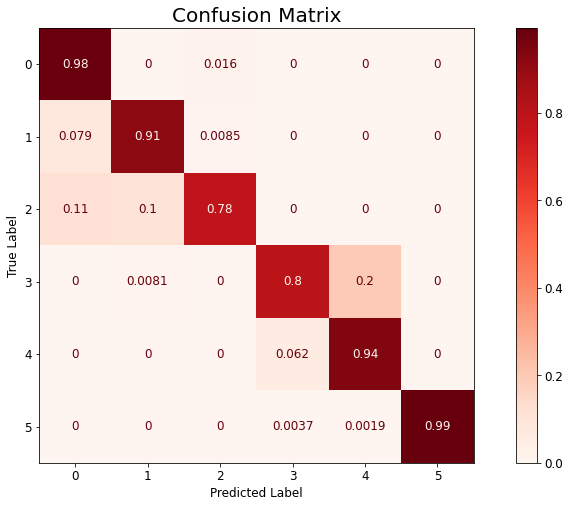

In [ ]:
confusion_matrix(neigh,X_test_scaled,y_test)